## Recreating Elements of David Martin et al. 2023 Paper



Today I will be walking you through how to create some of the charts and statistical tests that can be found in the 2023 paper, "The Benchmark M Dwarf Eclipsing Binary CM Draconis with TESS: Spots, Flares, and Ultra\-Precise Parameters". Before we dive into the logistics of this paper, let's take a moment to explain where our data came from and what it means.



CM Draconis is a binary star system consisting of two nearly identical red dwarfs. The stars are located extremely close together, have an orbital period of 1.26 days \(or semimajor axis of ~0.017 AU\), and have an inclination of nearly 90 degrees, meaning that these stars eclipse in our line of sight making them ideal candidates for study. We study these stars by analyzing the light we receive from the system. We can find eclipses at regular intervals because when the stars have a primary or secondary eclipse the amount of light observed from the system drops by nearly 50%. Some other features of this system include flares \(intense bursts of radiation from the star\) and sunspots \(similar to our Sun, a cooler region on the surface of the star\). Flares produce sharp spikes in the amount of light we observe whereas sunspots will either moderately increase or decrease the light we observe. This topic may seem a bit abstract so we've included some examples from the data below so you can see for yourself!



First things first, we must upload our data and import all of the necessary modules required for data analysis.


In [1]:
#First import all relevant modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy import stats
from scipy.stats import t as student_t
from scipy.stats import norm

In [11]:
#Import the data used in the paper
lightcurve = np.genfromtxt('lightcurve.csv',delimiter=',')
lc_time = lightcurve[:,0]
lc_flux = lightcurve[:,1]
lc_err = lightcurve[:,2]

spots = np.genfromtxt('corrected_spot_modulation.csv',delimiter=',')
spots_time = spots[:,0]
spots_flux = spots[:,1]

flare_table = np.genfromtxt('flare_table.csv',delimiter=',')
flare_time = flare_table[:,0]
flare_amp = flare_table[:,1]
flare_energy = flare_table[:,2]



[          nan 1743.75558791 1744.49585471 1747.20831772 1752.94157955
 1758.69567967 1759.24845237 1759.70400392 1760.48871962 1761.71232158
 1817.54579277 1821.15695012 1823.11809025 1823.8653242  1835.45024218
 1901.43503232 1902.55866515 1902.76005797 1903.02117419 1904.58231609
 1906.56152218 1912.31719288 1915.56724271 1921.60067169 1921.83817549
 1924.2507141  1925.38823226 1938.65921325 1940.16200747 1945.09537218
 1945.98843297 1946.91343844 1947.21621801 1947.9342778  1953.09125189
 1960.53710777 1972.11903548 1972.81903185 1973.06208616 1974.87041032
 1979.18288814 1980.0328837  1980.65788044 1989.84807209 1991.98138386
 1994.23552781 1997.01743769 1997.73825955 2000.50210704 2001.84792074
 2007.48256178 2010.66167458 2010.74083968 2017.08933368 2017.71015589
 2020.26844385 2025.13362103 2029.12659214 2030.07518367 2032.53068926
 2034.16815665 2642.82242149 2645.22524441 2645.53358357 2646.17248454
 2647.30722814 2648.53225088 2649.59338086 2649.95588689 2655.68512611
 2659.

Alright, we've imported all of our data. Let's get a general idea of what it looks like! Let's begin with our general light curve, this will allow us to see how the amount of light we receive from the system changes with time.


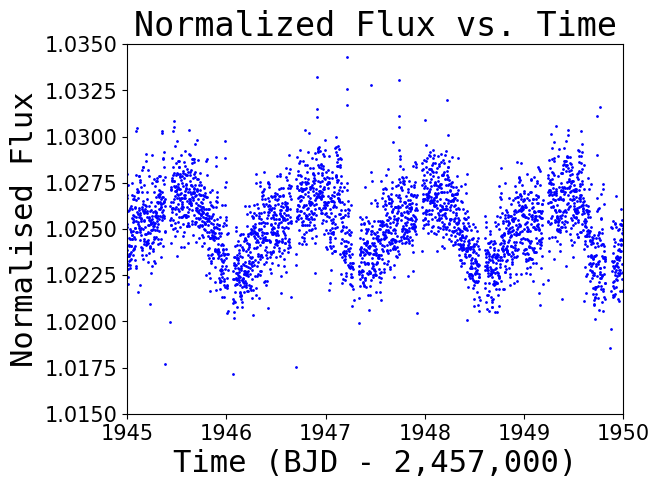

In [10]:
#Plotting the general light curve
fig = plt.figure()
plt.scatter(lc_time, lc_flux,s=1,color='blue') 
plt.xlabel('Time (BJD - 2,457,000)', fontsize = 22, fontfamily = 'monospace')
plt.ylabel('Normalised Flux', fontsize = 22, fontfamily = 'monospace')
plt.title('Normalized Flux vs. Time', fontsize = 24, fontfamily = 'monospace')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([1945,1950]) # zoom in to see the primary/secondary eclipses!
plt.ylim([1.015,1.035]) # zoom in to see the sun spots/flares in action!
plt.show(block=False)

Wow, well that's indeed a graph, but it's hard to really see any features. Let's try zooming in to get a better look at some events! Try uncommenting the line "plt.xlim\(\[1945,1950\]\) so that it runs as part of the code, then come back down to continue. 

The dips you can now see are the primary and secondary eclipses, pretty interesting! Another interesting feature of this lightcurve is that there are seemingly random spikes in flux \(take a close look at timestamps 1945, 1946, and 1947 around the flux of 1.02 mark\). You might think this is the work of mischievous aliens shining flashlights at our telescopes \(which I suppose we can't rule out\). Instead, these variations in the lightcurve are attributed to 2 processes happening on the photosphere of stars; sunspots and solar flares. 

Sunspots are interesting features on stars where a small region/spot appears darker than its surrounding region \(hence the name sunspot... astrophysicists are very good at naming things\). The surface temperature at the location of a spot is much cooler than the average surface temperature of the star, and thus the light emitted is relatively not as luminous. A solar flare has precisely the opposite effect; these are regions on a star where a ginormous amount of energy is located within one region and is released via the emission of electromagnetic radiation \(causing a spike in light flux\). The origins of these stellar phenomena are due to variations in a star's magnetic field, but this is beyond the scope of our tutorial \(although we encourage interested readers to check out this NASA article for concise explanations and animations: [https://spaceplace.nasa.gov/solar\-activity/en/](https://spaceplace.nasa.gov/solar-activity/en/) \). 

Now, let's get an even closer look to find some of those spots and flares. Try uncommenting the line "plt.ylim\(\[1.015,1.035\]\) and take a look at the graph. We'll meet you back down here to explain. 

What you can see is the sinusoidal\-like pattern the sunspots cause as the stars rotate. The dips occur when the spots face us \(blocking out more light\) and the crests occur when the spots on the side of the star are opposite to our view. We can take an even closer look at this pattern by accessing the data pertaining directly to spots and their relative flux. Let's take a look by running the code below!


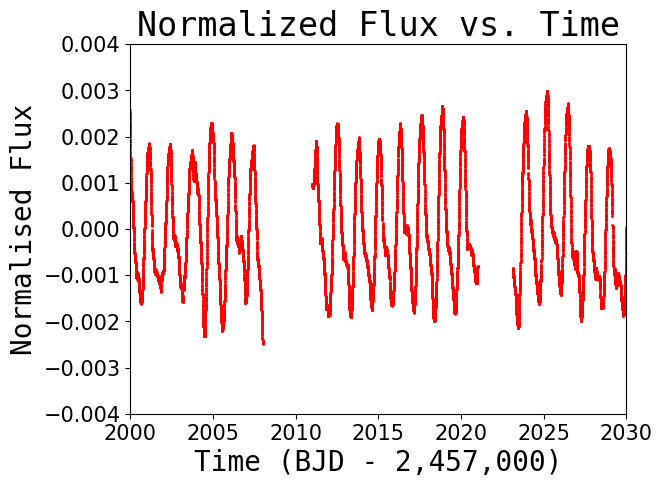

In [4]:
## Plotting the normalized flux purely due to sunspot modulations ##
fig = plt.figure()
plt.scatter(spots_time,spots_flux,color='red',s=1)
plt.xlabel('Time (BJD - 2,457,000)', fontsize = 20, fontfamily = 'monospace')
plt.ylabel('Normalised Flux', fontsize = 20, fontfamily = 'monospace')
plt.title('Normalized Flux vs. Time', fontsize = 24, fontfamily = 'monospace')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([2000,2030])
plt.ylim([-0.004, 0.004]) #Zoom in on y-axis to see the flux activity
plt.show()

Next, let's take a look at some flares. Within our raw light curve data, we observed 163 flares. The times of these flares, their amplitude, and energy are all available in flare\_table, but let's just take a look at the general light curve \(they tend to jump out\). Run the code below to get a taste of what a flare looks like! 


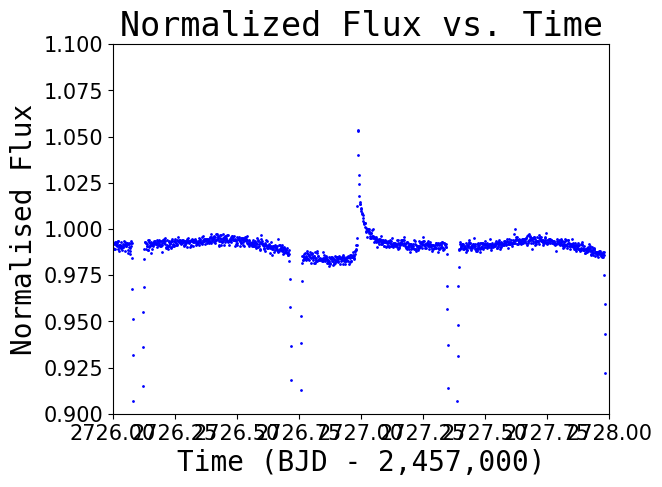

In [5]:
## Plotting the flare at 2727 (BJD-2,457,000) from our general lightcurve ##
fig = plt.figure()
plt.scatter(lc_time, lc_flux,s=1,color='blue')
plt.xlabel('Time (BJD - 2,457,000)', fontsize = 20, fontfamily = 'monospace')
plt.ylabel('Normalised Flux', fontsize = 20, fontfamily = 'monospace')
plt.title('Normalized Flux vs. Time', fontsize = 24, fontfamily = 'monospace')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([2726,2728]) #One flare occurs at a time of ~2727 
plt.ylim([0.9,1.1])
plt.show()

Here we can see a flare occurring around the time stamp 2727.00. It is very characteristic of a flare to have a very sudden uptick in brightness, with the slow degradation back to normal that can be seen. 

Before we move on from these plots, it's worth stopping here and discussing the rather interesting time unit we are using. Barycentric Julian Date, or BJD, is used to more accurately ascribe a time to a given flux measurement we receive from a source. Since Earth orbits under roughly circular motion \(as do the telescopes that orbit Earth\), the Earth's reference frame is accelerating. As we know from special relativity, time measurements will change depending on your frame of reference. Light moves at a finite speed, and since Earth moves both away and toward a light source, an observer on Earth would measure a time on the order of light minutes off from the rest frame time! This is not good, because we would like to know exactly when an event we are witnessing occurs with as little error as possible. Thus, we measure the time it would take light from the same event to reach the barycenter \(or center of mass\) of our solar system since to a good approximation the barycenter is not accelerating, and calculate the timing of each event as seen from Earth using this measurement. 

For more information on BJD, check out this helpful page from The Ohio State: [https://astroutils.astronomy.osu.edu/time/bjd\_explanation.html](https://astroutils.astronomy.osu.edu/time/bjd_explanation.html) 



Finally, let's look at our light curve in one more unique way. We're going to recreate the graph shown below through a process called phase folding, and it will allow us to see the incredible regularity of the primary and secondary eclipses during the sun's orbital periods. However, we first need to detrend our light curve, which is a fancy way of saying that we're going to remove the sinusoidal "background noise" that the sunspots create. Be aware that this process requires an extra package called Wotan that will do our detrending for us. If this is not installed in your Jupyter Notebook Terminal, you're in for a novel of error codes!

![](.2024-03-01-file-1.ipynb.upload/paste-0.7984166040637268)



(2726.0, 2728.0)

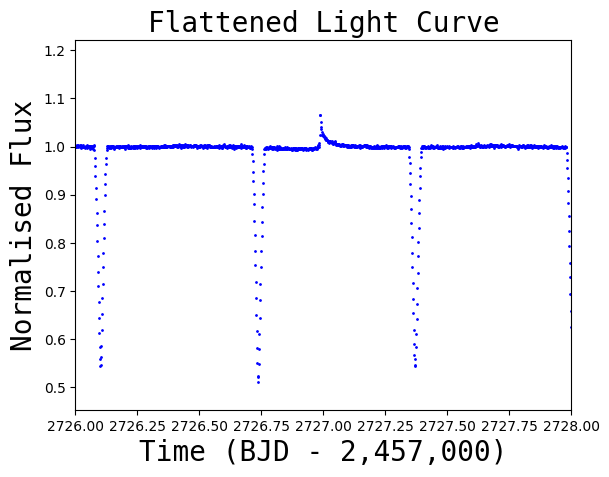

In [6]:
#Import relevant package
from wotan import flatten

#Detrend or flatten our light curve using a pre-set Wotan function
flatten_lc, trend_lc = flatten(lc_time, lc_flux, window_length=0.5, method='biweight', return_trend=True)

#Graph our flattened light curve and zoom in on a specific region for viewing ease
plt.scatter(lc_time, flatten_lc, s=1, color= 'blue')
plt.xlabel('Time (BJD - 2,457,000)', fontsize = 20, fontfamily = 'monospace')
plt.ylabel('Normalised Flux', fontsize = 20, fontfamily = 'monospace')
plt.title('Flattened Light Curve', fontsize = 20, fontfamily = 'monospace')
plt.xlim([2726,2728])

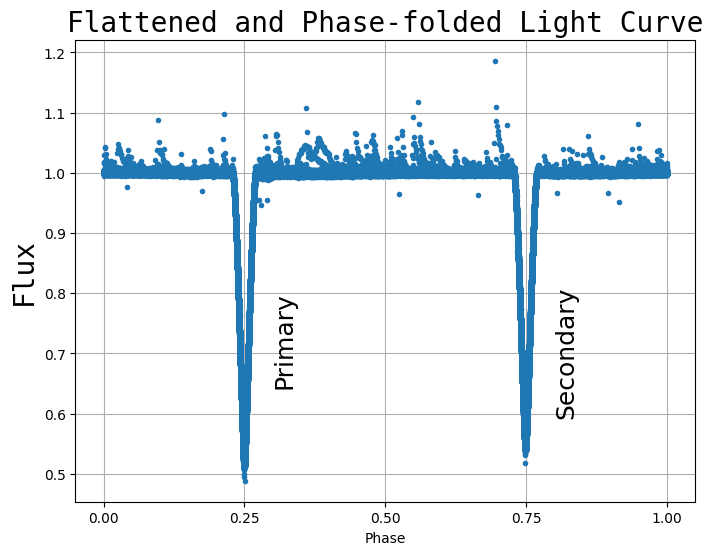

In [8]:
# Compute phases by shifting primary eclipse to t = 0, dividing by period, adding .25 for graphing purposes
phase = ((lc_time-1743.735) / 1.2683900573+0.25) % 1  # Compute phase values ranging from 0 to 1

# Sort data by phase
sorted_indices = np.argsort(phase)
sorted_phase = phase[sorted_indices]
sorted_flux = flatten_lc[sorted_indices]

# Plot phase-folded light curve
plt.figure(figsize=(8, 6))
plt.plot(sorted_phase, sorted_flux, '.')
plt.xlabel('Phase')
plt.xticks(np.linspace(0,1,5))
plt.ylabel('Flux', fontsize = 20, fontfamily = 'monospace')
plt.title('Flattened and Phase-folded Light Curve', fontsize = 20, fontfamily = 'monospace')
plt.text(0.30, .65, 'Primary', rotation = 90, fontsize = 18)
plt.text(0.80, .60, 'Secondary', rotation = 90, fontsize = 18)
plt.grid(True)
plt.show()

Looks pretty good! Now that we have a baseline understanding of where our data comes from and what parts we care about most, it's time to use it to study some stellar phenomena!


## Recreating Flares vs. Spot Flux



![](.2024-03-01-file-1.ipynb.upload/paste-0.5667640961605129)

Our first take will be to recreate the graph above. However, to do that, we must first determine how many flares occur during times of negative spot flux \(the dips we previously mentioned\) or times of positive spot flux \(the crests\). To do that, we will use our handy array of flare\_time. By locating the time of each flare, we can then locate a timestamp a little before and a little after in the array spots\_time. Since the length of spots\_time is equal to spots\_flux, all we need to do is find the specific element of spots\_flux that corresponds to the element of spots\_time containing our desired time slots. If this is sounding a little confusing, don't worry, it will be easier to follow when you look through the code! Once we have a spot flux a little before and a little after a flare, we can make a line connecting those two points and estimate the spot flux at the time of the flare! Let's see how it's done.


In [8]:
def calculate_line_equation(x1, y1, x2, y2):
    # Calculate the slope of the line
    slope = (y2 - y1) / (x2 - x1)
    
    # Use one of the points to calculate the y-intercept (b) using the slope-intercept form of the line equation
    b = y1 - slope * x1
    
    return slope, b

# How far (time wise) on either side of the flare we look #
# Making this small should make our data more accurate #
margin = 1e-5

#Keep track of how many flares occur during positive and negative flux, and what the specific flux was at time of flare
positive_flux = []
negative_flux = []

#Loop through each instance of a flare
for ii in range(1, len(flare_time)):
    flare = flare_time[ii]

    #Find a time stamp a little before the flare
    for jj in range(0, len(spots_time)):
        lower_value = spots_time[jj]
        if (lower_value <= flare - margin):
            #print("Lower Value = " + str(lower_value))
            index_lower = jj
            break 
            
    #Find a time stamp a little after the flare
    for kk in range(jj, len(spots_time)):
        upper_value = spots_time[kk]
        if (upper_value >= flare + margin):
            #print("Upper Value = " + str(upper_value))
            index_upper = kk
            break
    
    #In this case, x values are the time stamp, and the y values are the spot flux at the time
    x1, y1 = lower_value, spots_flux[index_lower] 
    x2, y2 = upper_value, spots_flux[index_upper]
 
    #Pass our x and y values into a function that creates a line between the points so we can estimate spot flux during flare
    slope, y_intercept = calculate_line_equation(x1, y1, x2, y2)

    #Estimate spot flux during time of flare
    value = (flare * slope) + y_intercept
    
    #Keep track of estimated spot flux values during flares
    if value < 0:
        negative_flux.append(value)
    else:
        positive_flux.append(value)
        
print('Number of flares during positive flux: ' +str(len(positive_flux))) 
print('Number of flares during negative flux: ' +str(len(negative_flux)))

Number of flares during positive flux: 105
Number of flares during negative flux: 58


We find that 105 flares appear to occur during times of positive spot flux, while 58 occur during times of negative spot flux. This result is slightly different from the Martin et al 2023 paper where they found 104 flares present in positive spot flux and 59 flares present in negative spot flux. However, since this is a difference of only one flare its effect should be minimal. This difference is likely due to one of the flares occurring very close to a shift from positive to negative spot flux or vice versa. We attempted to solve this problem by creating a tighter margin, but we were unable to completely recreate the flare counts present in Martin et al 2023. 

That being said, let's take a look at how our graph lines up to the one in the paper!



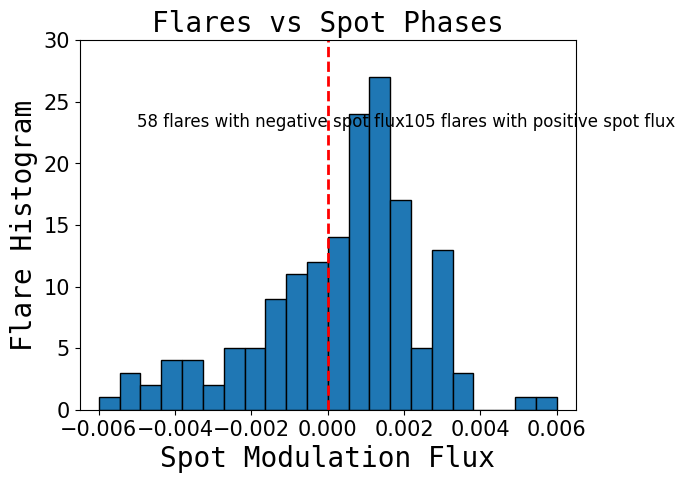

In [9]:
#Put all flux values calculated during flares in a single array for graphing purposes
all_sample_flux = np.concatenate((negative_flux, positive_flux))

# Calculate the bin edges
bin_edges = np.linspace(-0.006, 0.006, 23)  

# Create the histogram
fig = plt.figure()
plt.hist(all_sample_flux, bins=bin_edges, edgecolor='black')
plt.ylim(0, 30)
plt.text(0.002, 23, str(len(positive_flux)) + ' flares with positive spot flux', fontsize = 12)
plt.text(-0.005, 23, str(len(negative_flux)) + ' flares with negative spot flux', fontsize = 12)
plt.title('Flares vs Spot Phases', fontsize = 20, fontfamily = 'monospace')
plt.xlabel('Spot Modulation Flux', fontsize = 20, fontfamily = 'monospace')
plt.ylabel('Flare Histogram', fontsize = 20, fontfamily = 'monospace')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Adjust the x-axis limits to center the bins on x=0
plt.xlim(-0.0065, 0.0065)

# Add a vertical line at x=0
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)

plt.show()

#max(all_sample_flux)

## Recreating Statistical Tests for Flares vs. Spot Flux



Wow! That's a pretty plot! While it looks visually stunning it is also very useful to our research. At first glance, we can see that there seems to be a higher prevalence of flares when the spot flux is positive than when it is negative. While we would love to say that the relationship between these two is significant just by looking at it, this would be a little fool\-hardy. To tell whether there is a relationship between positive spot flux and flare occurrence we need to use our statistical tools!


## Bootstrapping Flare Data



Our goal is to evaluate the relationship between the spot flux and the number of flares measured. Our null hypothesis is that the number of flares has no relationship to the flux of a spot. In somewhat simpler words this means that the number of flares measured during negative and positive fluxes should be roughly the same. If we find that this hypothesis should be rejected then we would prove that the number of flares does have some relation to the flux of the spot and would likely see that one type of flux would have significantly more flares measured. We will walk through our statistical processes step by step. 

Before we dive in we want to know what quantities we have to work with. We have one sample data set \(shown in the plot above\), from which we can calculate the mean and standard deviation. Since we do not have infinite time with TESS observations, we do not have the ability to take more data samples. We know that the best way to find the significance between two variables is to have many samples taken which we can use in our statistical tests. Since we can't take any more data, the best way to increase the number of samples is to use a bootstrapping method whereby we produce more sample data from our original sample. I've listed some of the steps we took below! These might be most useful to reference as you move through our code as they will provide insight into why we chose to perform certain steps.

1.\) To create a new sample set, we pick 163 \(the number of flares in our original data set\) random times from the spot flux vs. time data. The idea here is to imagine we have 163 hypothetical flares occurring at any time during the cycle and see whether or not it falls on a spot with a negative or positive flux. It's important to mention here that bootstrapping allows for a time value to be picked multiple times. 

2.\) After we pick 163 random times from our original time data we want to find the spot fluxes corresponding to each of these times. This way we now have 163 spot fluxes for each of our 163 hypothetical flares. Once we have the flux values for spots, we want to find how many are positive and negative by seeing whether or not each value is greater than 0. Once we find the number of flares that occur in a spot with positive flux we compare this number to the number from our original sample which was a total of 104 flares and count the number of samples with a flare count greater or equal to this number. 

3.\) We repeat this process 10,000 times to get a large number of samples analyzed. To find the p\-value and determine if the relationship is significant we divide the total number of samples that had greater or equal to 104 flares with positive flux and divide this number by the number of samples which in this case is 10,000.

4.\) Initially we found that the p\-value from these calculations had some variability and would change by some degree. To fix this we had our code calculate 100 p\-values which we then averaged over. This solved the problem of having variable p\-values and gave us a final p\-value that is relatively close to the one found in the results of Martin et al 2024.

Beware the code below is a bit slow but does run fully.



In [10]:
#Bootstrap the flare data

p_values = [] #List of p-values, each coming from one of the 100 trials taken
for ii in range(100):
    num_times = 10000  #Number of test samples made to calculate p-value
    tot_counts = 0 #Counter used to count how many samples have a number equal to or greater than 104 of flares that are located in positive flux spots
    
    index = np.arange(0,len(spots_time))
    for ii in range(0, num_times):
        pos_count = 0 #A counter to keep track of how many positive spot fluxes are measured
        bs_index = np.random.choice(index, 163, replace = True) #Choosing 163 random times from the spot vs. time data. replace=True allows for duplicates
        for kk in range(0, len(bs_index)):
            if spots_flux[bs_index[kk]] > 0: #Testing whether or not a spot flux is negative or positive
                pos_count += 1
        #One tailed test for 104 flares in postive/negative flux or rarer       
        if pos_count >= 104: #Testing to see whether or not a sample has equal to or greater than 104 flares that are located in positive flux spots
            tot_counts += 1
               
    p_value = tot_counts / num_times #p-value calculations for each trial of 10000 samples
    p_values.append(p_value)
    
print(f'The average p-value is {np.mean(p_values)}') #Finding the average p value from 100 trials

The average p-value is 0.007454


Our average p\-value from the bootstrapping is very close to the value found in Martin et al 2024 of .0083! We would expect some variability between the two results since we don't know for certain if Martin et al. averaged their p\-values or used one bootstrapping p\-value result. While we may see some small variability we are still confident in our result since it is well within the same magnitude as the published result which is promising!


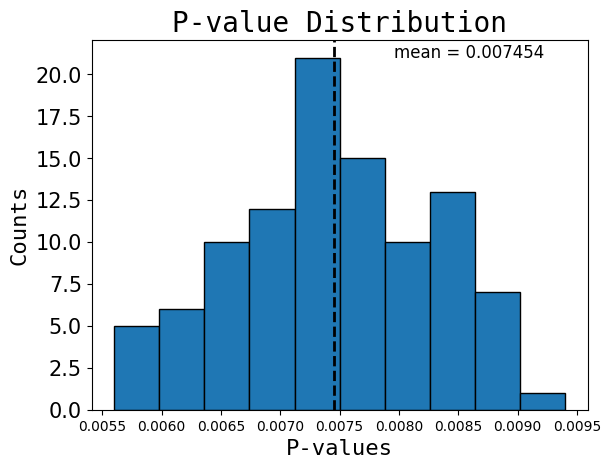

In [12]:
## Now plot the p value distribution ##

counts, bins, ignore = plt.hist(p_values, bins = 10, edgecolor='black')
plt.title('P-value Distribution', fontsize = 20, fontfamily = 'monospace')
plt.ylabel('Counts', fontsize = 16, fontfamily = 'monospace')
plt.xlabel('P-values', fontsize = 16, fontfamily = 'monospace')
plt.axvline(np.mean(p_values), c = 'black', linewidth = 2, linestyle = 'dashed')
plt.text(np.mean(p_values)+.0005, max(counts), f'mean = {np.mean(p_values)}', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)
plt.show()

The plot above is a histogram showing the distributions of p\-values that were found. There is some variability in the p\-values that were calculated from our bootstrapping which required the implementation of an average p\-value shown by the vertical black line.


As a second test, Martin et al 2024 completed a one\-sample Student T test which compared our distribution of the spot flux or the flares to a normal distribution centered with a mean at 0. In the next part of our project, we replicate the same methods and obtain the same results. First, we must shift our distribution of the spot fluxes for our flares so that the mean of this distribution is 0. This way the mean of our normal distribution and distribution of our data will be the same! This will make the comparison of our data distribution to the normal much easier in future steps.



In [13]:
#Shift the sample fluxes by the difference between 0 point and mean

all_sample_flux = np.array(all_sample_flux)

sample_mean = np.mean(all_sample_flux) #Mean of our orginal sample
#print(sample_mean)

shifted_sample_flux = all_sample_flux - sample_mean #Our sample data set but shifted so that the mean is the same as the null hypothesis

shift_mean = np.mean(shifted_sample_flux) #Double check to make sure the shifted mean ~ 0
#print(shift_mean)

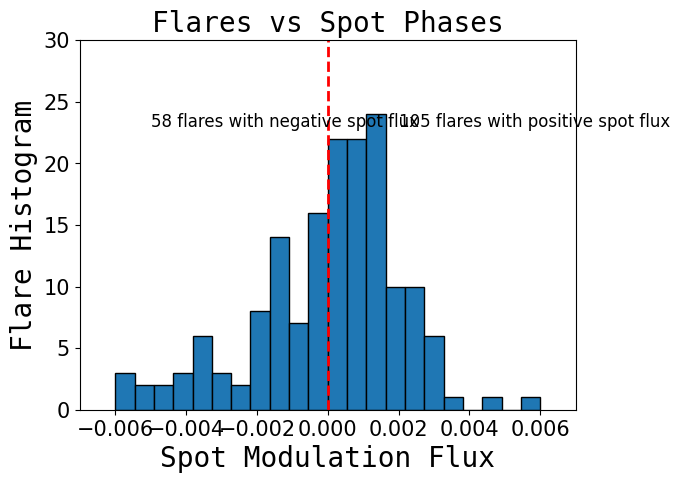

In [14]:
#Plotting the shifted flux vs. flare data
fig = plt.figure()
plt.hist(shifted_sample_flux, bins=bin_edges, edgecolor='black')
plt.ylim(0, 30)
plt.text(0.002, 23, str(len(positive_flux)) + ' flares with positive spot flux', fontsize = 12)
plt.text(-0.005, 23, str(len(negative_flux)) + ' flares with negative spot flux', fontsize = 12)
plt.title('Flares vs Spot Phases', fontsize = 20, fontfamily = 'monospace')
plt.xlabel('Spot Modulation Flux', fontsize = 20, fontfamily = 'monospace')
plt.ylabel('Flare Histogram', fontsize = 20, fontfamily = 'monospace')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Adjust the x-axis limits to center the bins on x=0
plt.xlim(-0.007, 0.007)

# Add a vertical line at x=0
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)

plt.show()

Shown above is the same graph of spot modulation flux vs. flares as we had before, but now the data set is shifted so the mean is at 0.



## T\-test for a different method



Now that we have our data shifted over, we can create the t\-distribution that we will compare to the normal distribution \(our null hypothesis\). We create our t\-distribution by bootstrapping our shifted data set and finding the mean for each sample. Our goal is to obtain enough bootstrapped means so that we can get a clear enough distribution to compare to the null. In our methods, we found 1000 bootstrapped means and examined their distribution. Since the mean of our original sample is 0 we would expect that the means would create some distribution centered around 0. This is why we shifted the data over before! Since both our bootstrapped mean distribution and the null hypothesis have the same mean they will be much easier to compare!

However, our goal here isn't just to create bootstrapped samples, it is to find whether or not there is a significant relationship between the spot flux and the likelihood of seeing a flare! To do so we employ a one\-sample Student T\-test and a p\-value calculation to try and recreate the results shown in Martin et al 2024! 

To calculate the p\-value, or the probability that the null hypothesis would produce a data set like ours, we look at our bootstrapped mean distribution. It is important to note that for these calculations we employed a one\-sided p\-value test by counting how many of our bootstrapped means are equal to or greater than our original sample's mean. By dividing this number by the total number of bootstrapped mean values we created we can find the probability that our sample is not produced by the null hypothesis.

Additionally, we also employed a Student T\-Test. The value of the T\-test will tell us how many standard deviations our sample mean is away from the null mean. In this case, our null mean is 0. It is generally accepted that if your sample is above 1.96 standard deviations from the null mean, you can reject your null hypothesis and say there is a relationship between your variables \(It is also worth mentioning that like the accepted p\-value of .05, a significant T value of 1.96 is arbitrary. One could choose any value to indicate statistical significance\). 



In [15]:
#Now that the sample is shifted we can bootstrap the data and find a distribution of the means, for our calculations we will run 1000 trials where we find 163 bootstrapped mean values

p_vals = []
bs_means = []
for mm in range(1000):
    bs_flux = []
    for ii in range(163):
    
        data = np.random.choice(shifted_sample_flux, len(shifted_sample_flux), replace=True)
        mean = np.mean(data)
        bs_means.append(mean)
        bs_flux.append(mean)
    

    p_count = 0               #Count of how many bootstrapped means are above the sample mean
    bs_flux = np.sort(bs_flux)
    #print(bs_flux)
    for jj in range(len(bs_flux)):
        if bs_flux[jj] >= sample_mean:
            p_count += 1
        elif bs_flux[jj] <= -1*sample_mean:
            p_count += 1
        else:
            pass

    num_sam = 163                     #Number of bootstrapped means
    p_vals.append(p_count/num_sam)    #p value calculations

p_value = np.mean(p_vals) #Averaging all of the p value for 100 trials, p values were too variable before so we averaged over several trials
print(f'The p value is {p_value}') #Final p-value

#T test calculations
#mean of the sample is sample_mean, mean of the normal distribution is shift_mean
num = sample_mean - shift_mean
sam_std = np.std(all_sample_flux) #standard deviation of the sample
den = sam_std/(np.sqrt(163)) #Size of sample is 163 flares/spot fluxes
t_val = num/den
print(f'The T test value is {t_val}')

#Double checking our calculated value to those found with Scipy!
t_statistic, p_value = stats.ttest_1samp(all_sample_flux, 0)
print('t-statistic:', t_statistic)
print('p-value:', p_value)
print()

large_bs_flux = []
for ii in bs_means: 
    if ii > sample_mean:
        large_bs_flux.append(ii)
    else: 
        pass


The p value is 0.04623312883435583
The T test value is 2.008693870295639
t-statistic: 2.0025227531917373
p-value: 0.046896808911395714



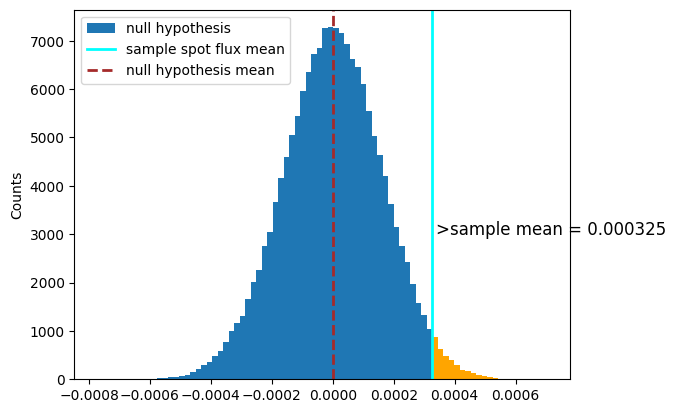

In [16]:
## Plotting the distribution of bootstrapped means and the number that fall above the observed mean ##
## Not many fall above the observed mean !! This means we can reject the null hypothesis, or that spots and flares have no relationship ##
n, bins, patches = plt.hist(bs_means, bins = 82, histtype = 'barstacked', label = 'null hypothesis')

for i in range(61, 82):
    patches[i].set_facecolor('orange')
    
# plt.hist(large_bs_flux, bins = 5, histtype = 'barstacked', label = 'spot fluxes')
plt.axvline(sample_mean, c = 'cyan',linewidth = 2,  label = 'sample spot flux mean')
plt.axvline(np.mean(bs_means),linestyle = 'dashed',linewidth = 2, c = 'brown', label = 'null hypothesis mean')
plt.text(0.00034, 3000, f'>sample mean = {np.mean(round(sample_mean,6))}', fontsize = 12)
plt.ylabel('Counts')
plt.legend()
plt.show()


## Comment this in to see even more bins! ##
# n, bins, patches = plt.hist(bs_means, bins = 600, histtype = 'barstacked', label = 'null hypothesis')

# for i in range(446, 600):
#     patches[i].set_facecolor('orange')
    
# # plt.hist(large_bs_flux, bins = 5, histtype = 'barstacked', label = 'spot fluxes')
# plt.axvline(sample_mean, c = 'cyan',linewidth = 2,  label = 'sample spot flux mean')
# plt.axvline(np.mean(bs_means),linestyle = 'dashed',linewidth = 2, c = 'brown', label = 'null hypothesis mean')
# plt.text(0.00034, 400, f'>sample mean = {np.mean(round(sample_mean,6))}', fontsize = 12)
# plt.ylabel('Counts')
# plt.legend()
# plt.show()

We found a p\-value of ~.046 and a T\-value of 2.008! In our plot above we can see the portion of the bootstrapped mean distribution \(orange part\) that was greater than the sample mean and that we used to find the p\-value. We solved for the T\-value by using the respective equations and then double\-checked both our p and T\-values with the scipy stats functions. Our calculated values are also very close to the ones found in Martin et al 2024. There was a bit of variability between our values and those found in the paper, but these were to be expected since our bootstrapping wouldn't produce exact replicant values. 

Below we've included a visualization of the student T\-test distribution and how one would find the p\-value via this method. It is important to note when working with a T distribution that the distribution won't be normal and the shape will depend on the degrees of freedom \(DOF\). As we have seen before the number of degrees of freedom is just the number of points in your sample minus 1 \(DOF = N \- 1\). The larger the degrees of freedom the closer the T distribution becomes to being a normal distribution. Shown below are T distributions with 1 and 3 degrees of freedom to give a visual of how this function changes with different DOF. We've also plotted a normal distribution and our current T distribution with 162 degrees of freedom. The two are practically identical due to the high degree of freedom value in our T distribution. 

Armed with our T distribution and our T\-value we can easily find the p\-value. We integrate from our T\-value to infinity and multiply by 2 since the distribution would be symmetric. While this is not the way we found our p\-value. it's useful to mention and provide some help in understanding what we are doing when we solve for the p\-value conceptually.


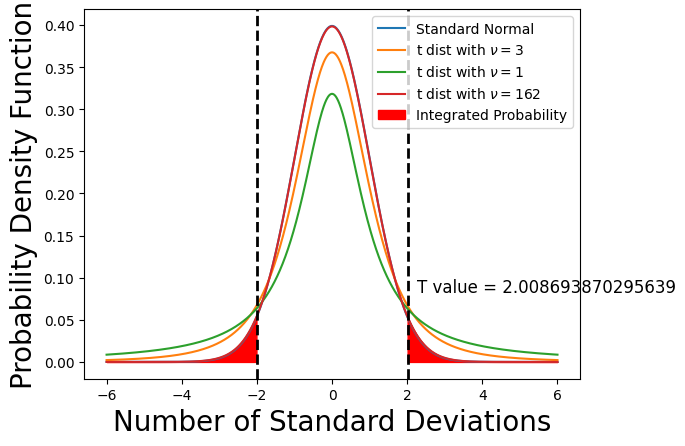

In [18]:
#What does our T distribution look like?
import numpy as np
from scipy.stats import t as student_t
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.linspace(-6, 6, 1000)


t_1pdf = student_t.pdf(x,1)
t_2pdf = student_t.pdf(x,2)
t_3pdf = student_t.pdf(x,3)
t_4pdf = student_t.pdf(x,4)
t_5pdf = student_t.pdf(x,5)
normal = norm.pdf(x,0,1)
t_obspdf = student_t.pdf(x,162, scale=1)

# also plot a normal distribution for comparison

fig = plt.figure()
plt.plot(x,normal,label=r'Standard Normal')
#If you want to see how our distribution compares to T functions with less degrees of freedom you can uncomment these! As we can see from our graph, whenn our degrees of freedom are high, our function approaches the normal distribution!
#plt.plot(x,t_5pdf,label=r't dist with $\nu=5$')
plt.plot(x,t_3pdf,label=r't dist with $\nu=3$')
plt.plot(x,t_1pdf,label=r't dist with $\nu=1$')
plt.plot(x,t_obspdf,label=r't dist with $\nu=162$')
plt.axvline(t_val, c = 'black', linewidth = 2, linestyle = 'dashed')
plt.axvline(-t_val, c = 'black', linewidth = 2, linestyle = 'dashed')
plt.text(t_val+.25, np.mean(t_obspdf), 'T value = 2.008693870295639', fontsize = 12)
plt.xlabel('Number of Standard Deviations',fontsize=20)
plt.ylabel('Probability Density Function',fontsize=20)
plt.fill_between(x[x<-1*t_val],t_obspdf[x<-1*t_val],0,label='Integrated Probability',color='red')
plt.fill_between(x[x>t_val],t_obspdf[x>t_val],0,color='red')
plt.legend()
plt.show()

### THIS CODE WOULD SHOW YOU THE CDF FOR THE ABOVE DISTRIBUTION ###
#What does our T CDF Distribution look like?
# t_1 = student_t.cdf(x,1)
# t_3 = student_t.cdf(x,3)
# t_5 = student_t.cdf(x,5)
# normal_cdf = norm.cdf(x,0,1)
# t_obs = student_t.cdf(x,162)

# fig = plt.figure()
# plt.plot(x,normal_cdf,label=r'Standard Normal')
# #If you want to see how our distribution compares to T functions with less degrees of freedom you can uncomment these! As we can see from our graph, whenn our degrees of freedom are high, our function approaches the normal distribution!
# plt.plot(x,t_1,label=r't dist with $\nu=1$')
# plt.plot(x,t_3,label=r't dist with $\nu=3$')
# #plt.plot(x,t_5,label=r't dist with $\nu=5$')
# plt.plot(x,t_obs,label=r't dist with $\nu=162$')
# #Code to Plot some nice dashed lines to show where our 
# plt.plot([2.008693870295639,2.008693870295639],[0,student_t.cdf(2.008693870295639,162)],'k--')
# plt.plot([-6,2.008693870295639],[student_t.cdf(2.008693870295639,162),student_t.cdf(2.008693870295639,162)],'k--')
# plt.plot([-2.008693870295639,-2.008693870295639],[0,student_t.cdf(-2.008693870295639,162)],'k--')
# plt.plot([-6,-2.008693870295639],[student_t.cdf(-2.008693870295639,162),student_t.cdf(-2.008693870295639,162)],'k--')
# plt.text(2.008693870295639+.1, np.mean(t_obspdf)+.5, 'T value = 2.008693870295639', fontsize = 12)
# plt.xlabel('Number of Standard Deviations',fontsize=20)
# plt.ylabel('Cumalative Distribution Function',fontsize=20)
# plt.legend(loc='best')
# plt.show()


In [25]:
#T Test Calculations!
sam_mean = np.mean(all_sample_flux) #mean of the sample, mean of the normal distribution is 0
num = sam_mean - 0
sam_std = np.std(all_sample_flux) #standard deviation of the sample
den = sam_std/(np.sqrt(163)) #Size of sample is 163 flares/spot fluxes
t_val = num/den
print(f'The t-test value we calculated is {t_val}')
#T test how many sigma away our sample mean is from the null mean. Generally if a t value is above 1.96 we consider the separation
#signifigant

#Lets now find the associated p value
#p value calculations, taking the area greater and less than t to find the probability the normal distribution creating our distribution
p_lessthan_t = student_t.cdf(-1*np.abs(t_val),163-1) 
p_greaterthan_t = 1-student_t.cdf(np.abs(t_val),163-1) #Taking the area of our CDF function at values less greater than the t value
p_value = p_lessthan_t + p_greaterthan_t #Adding up the two areas
print('p_value = ' + str(p_value)) #p value! #Probability of the normal distribution producing a distribution with the same mean as our sample

print() #print an empty space for visual
# scipy value when using a 1 sample t-tesst
t_statistic, p_value = stats.ttest_1samp(all_sample_flux, 0)
print('t-statistic:', t_statistic)
print('p-value:', p_value)
print()

The t-test value we calculated is 2.008693870295639
p_value = 0.0462307532566102

t-statistic: 2.0025227531917373
p-value: 0.046896808911395714



## Recreating Flares vs Orbital Phases



<img src=".2024-03-01-file-1.ipynb.upload/paste-0.641080892546346"   width="851.22px"  height="463.078px"  style="object-fit:cover"/>

Finally, let's recreate this graph displaying the amount of flares that occur during each orbital phase of CM Draconis. To do this, we'll need to determine when a flare occurs with respect to the orbital phase of the stars. That might sound a little complex, but it's much easier than you think. Before you try running the code below to recreate this graph, does anything strike you as strange about the one above? Notice how the number of flares observed is completely unaffected by the primary and secondary eclipse? That seems a little strange, considering one star is covering the other during these times. In fact, we expect that the number of observed flares would drop by at least 25% during these eclipses. Why not 50% you may ask, well that's because one star completely covering the other one only lasts for a short time. In reality, during an eclipse a percentage of the eclipsed star is being covered for most of what we call an eclipse, thus we can't expect a 50% drop. In any case, this is a weird result. Try and think of some reasons this would occur. Maybe it's possible that flares are occurring at the poles of each star and thus aren't covered by the eclipses?

Once you're done considering our question, feel free to run the code below. Let's see how well our graph will match the one above!



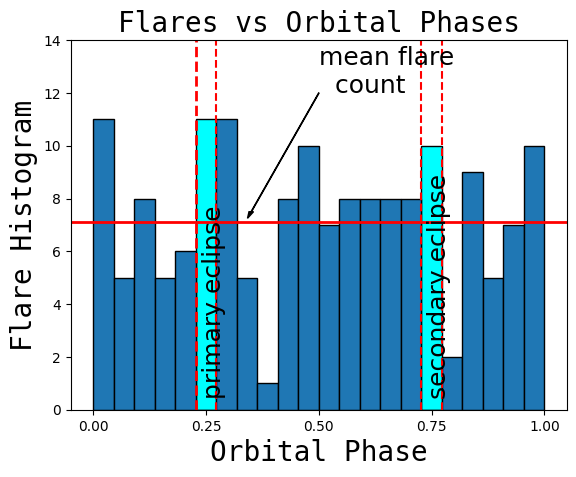

In [20]:
# Compute phase values ranging from 0 to 1
phase_flare = ((flare_time[1:]-1743.735) / 1.2683900573+0.25) % 1 #Subtracting 1743.735 moves first eclipse to t=0 and adding 0.25 are both 
                                                                  #for ease of access and graphing purposes
#Calculate the bin edges 
bins_edges = np.linspace(0, 1, 23)

#Isolate primary and secondary eclipses
primary_secondary = []
non_eclipse = []
#Margin is set by length of each bin divided by 2
margin = (1/(len(bins_edges)-1)/2)
for ii in range(0, len(phase_flare)):
    if (phase_flare[ii] > 0.25 - margin) and (phase_flare[ii] < 0.25 + margin):
        primary_secondary.append(phase_flare[ii])
    elif (phase_flare[ii] > 0.75 - margin) and (phase_flare[ii] < 0.75 + margin):
        primary_secondary.append(phase_flare[ii])
    else:
        non_eclipse.append(phase_flare[ii])

#Calculate mean flare rate of non-eclipsing bins, 22 bins total, 2 are for eclipses, 20 are for everything else
mean_non_eclipse = (len(non_eclipse)/20)
      
#Create the histogram
fig = plt.figure()
plt.hist(primary_secondary, bins = bins_edges, edgecolor = 'black', color = 'aqua') #Plot eclipse bins
plt.hist(non_eclipse, bins = bins_edges, edgecolor = 'black') #Plot non-eclipse bins
plt.xlabel('Orbital Phase', fontsize = 20, fontfamily = 'monospace')
plt.ylabel('Flare Histogram', fontsize =20, fontfamily = 'monospace')
plt.title('Flares vs Orbital Phases', fontsize = 20, fontfamily = 'monospace')

#Add details to the histogram
plt.text(0.24, .6, 'primary eclipse', rotation = 90, fontsize = 18)
plt.text(0.74, .6, 'secondary eclipse', rotation = 90, fontsize = 18)
plt.axhline(y=mean_non_eclipse, color='r', linestyle='-', linewidth=2) #Insert a line for mean flare count in non-eclipsing bins
plt.axvline(x=0.25 - margin, color = 'r', linestyle = '--', linewidth=2)
plt.axvline(x=0.25 + margin, color = 'r', linestyle = '--')
plt.axvline(x=0.75 - margin, color = 'r', linestyle = '--')
plt.axvline(x=0.75 + margin, color = 'r', linestyle = '--')
plt.arrow(0.5, 12, -.15, -4.5, head_width=0.01, head_length=0.25, fc='k', ec='k')
plt.text(0.50, 12, 'mean flare \n  count', fontsize = 18)

#Adjust limits to match those of Martin et al. 2023
plt.ylim(0, 14)
plt.xticks(np.linspace(0,1,5)) 

plt.show()

Look at that pretty plot!



## Conclusion



In this notebook tutorial, we dissected the light curves, isolated the flares and spot flux modulations, and counted how many flares pertained to a positive and negative spot flux. We then used our statistical tools and evaluated whether or not flares are more likely to occur in regions without sunspots using P\-value and One Sample Student T Test analysis. These results are consistent with those found in Martin et al 2023 and we make the same conclusion that we can reject our null hypothesis and that flares are more likely to occur in areas with positive spot fluxes \(areas without sunspots\).
